# CAP 5610 - Machine Learning Homework 1

#### Suma Marri
#### February 6th, 2022

## Problem 1: Python & Data Exploration

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

filename_loaded = "Dataset/myClassDataSet.csv" 
data_df = pd.read_csv(filename_loaded)

In [2]:
#testing if data was read and loaded correctly
data_df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,class
0,3.125845,4.213543,2.786926,0.832175,-1.178735,3.581140,-2.352872,7.804524,0
1,2.092247,3.383249,0.434993,2.003855,-2.525389,2.231663,-1.043635,7.149358,0
2,1.028549,3.944043,0.059291,0.011443,-1.309637,1.272289,-1.005366,7.434625,0
3,1.331028,4.920674,2.063895,1.424668,-1.073122,1.088142,-1.211250,8.603362,0
4,0.699447,5.427693,1.881804,0.387634,-0.134386,3.955468,-1.229464,7.241683,0


In [3]:
# (a)
# Use count() function to find the number of data points
print('Count Function: ')
data_count_df = data_df.count()
data_count_df

Count Function: 


f1       1000
f2       1000
f3       1000
f4       1000
f5       1000
f6       1000
f7       1000
f8       1000
class    1000
dtype: int64

In [4]:
# (a)
#  Use shape attribute to get the number of features for each data point.
# print('Shape Function: (rows, columns)')

m, n = data_df.shape
data_df.shape
print('Number of features:'); print(n)
print('Number of data points:'); print(m)

Number of features:
9
Number of data points:
1000


In [5]:
Y = data_df.values[:,-1]
#Y = data_df[data_df.columns[-1]] # class
X = data_df.values[:,0:-1]
#X = data_df[data_df.columns[data_df.columns.isin(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8'])]]

In [6]:
# (b)
# Use the info() function to create a short summary of your data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      1000 non-null   float64
 1   f2      1000 non-null   float64
 2   f3      1000 non-null   float64
 3   f4      1000 non-null   float64
 4   f5      1000 non-null   float64
 5   f6      1000 non-null   float64
 6   f7      1000 non-null   float64
 7   f8      1000 non-null   float64
 8   class   1000 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 70.4 KB


In [7]:
# (b)
# Use set_option() to make the data more readable
pd.set_option('display.precision', 3, 'display.width', 100)

In [8]:
# Testing if set_option worked.
data_df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,class
0,3.126,4.214,2.787,0.832,-1.179,3.581,-2.353,7.805,0
1,2.092,3.383,0.435,2.004,-2.525,2.232,-1.044,7.149,0
2,1.029,3.944,0.059,0.011,-1.310,1.272,-1.005,7.435,0
3,1.331,4.921,2.064,1.425,-1.073,1.088,-1.211,8.603,0
4,0.699,5.428,1.882,0.388,-0.134,3.955,-1.229,7.242,0


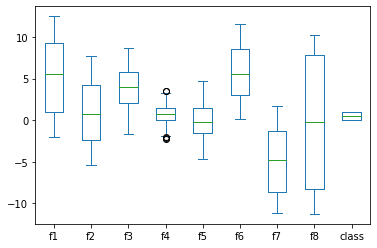

In [9]:
# (c)
# Use Box and Whisker Plots to review the distribution of each attribute
data_df.plot(kind='box')
plt.show()

In [10]:
# (c)
# The boxplots helps see analyze the the minimum, maximum, median, and quartiles of each section.
# This is helpful to compare the median and range of each feature.

In [11]:
import seaborn as sns
%matplotlib inline

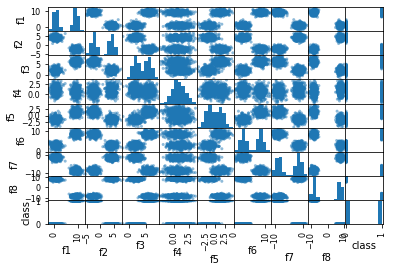

In [12]:
# (d)
# Plotting a scatterplot for each pair of feature
pd.plotting.scatter_matrix(data_df)
plt.show()

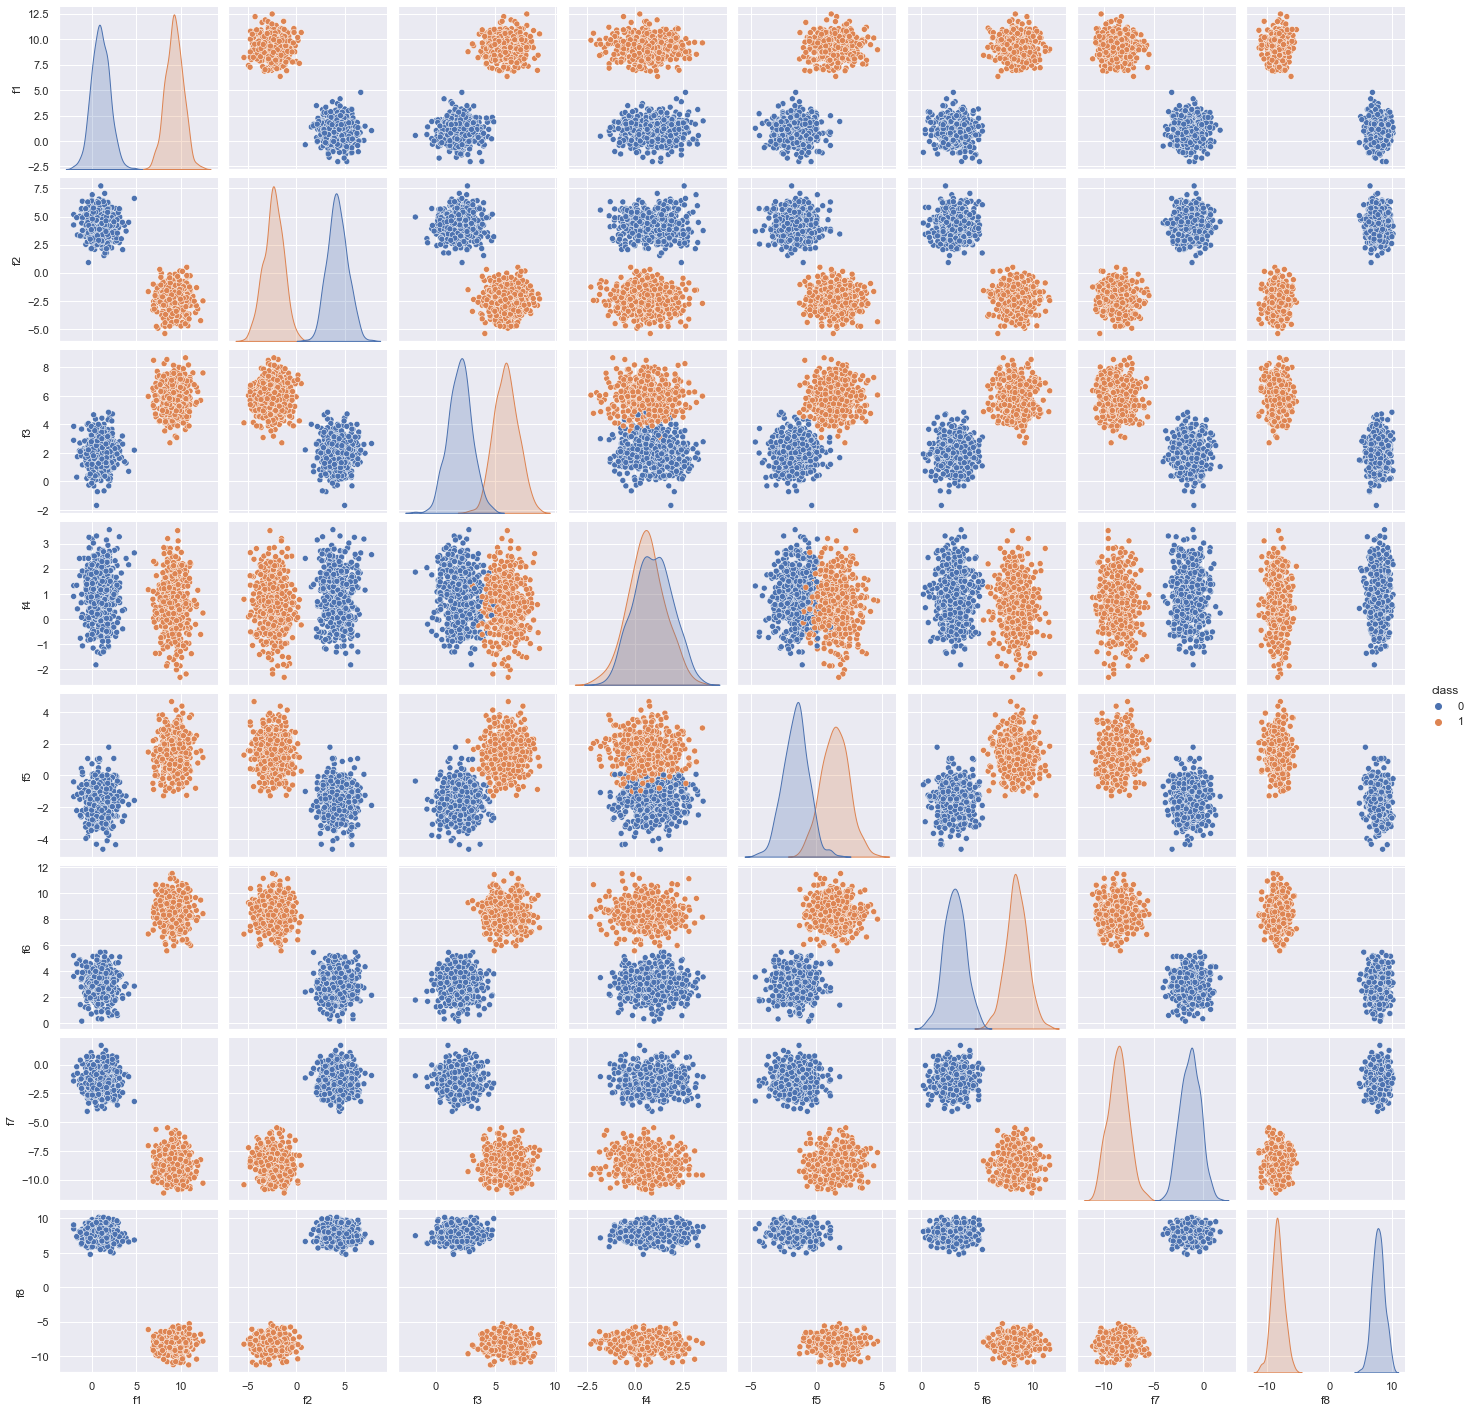

In [13]:
# (d)
# Plotting a scatterplot for each pair of feature and colored according to their target value
sns.set()
sns.pairplot(data_df, hue='class');

In [14]:
# (e)
# Create a Covariance matrix
data_df.cov()

,f1,f2,f3,f4,f5,f6,f7,f8,class
f1,18.104,-13.627,7.996,-0.727,6.187,11.449,-15.044,-33.268,2.070
f2,-13.627,11.876,-6.343,0.546,-4.951,-9.119,11.891,26.508,-1.647
f3,7.996,-6.343,4.694,-0.373,2.905,5.341,-7.058,-15.476,0.965
f4,-0.727,0.546,-0.373,0.993,-0.257,-0.520,0.593,1.375,-0.088
f5,6.187,-4.951,2.905,-0.257,3.219,4.143,-5.400,-12.087,0.748
f6,11.449,-9.119,5.341,-0.520,4.143,8.600,-10.068,-22.265,1.388
f7,-15.044,11.891,-7.058,0.593,-5.400,-10.068,14.171,29.199,-1.816
f8,-33.268,26.508,-15.476,1.375,-12.087,-22.265,29.199,65.657,-4.024
class,2.070,-1.647,0.965,-0.088,0.748,1.388,-1.816,-4.024,0.250


In [15]:
# Plot and show the Covariance matrix. 
cov = np.cov(data_df, bias=True)

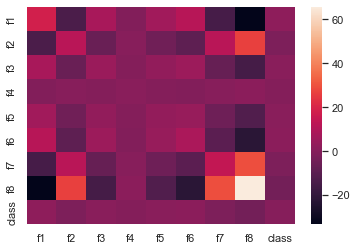

In [16]:
sns.heatmap(data_df.cov())
plt.show()

## Problem 2: Data Preparation and Feature Selection for Machine Learning

In [17]:
# import necessary packages to the Jupyter notebook
from pandas import read_csv
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

# read and load the csv data file
filename = "Dataset/myClassDataSet.csv"
dataframe = read_csv(filename)
array = dataframe.values

# separate array into input and output components
X = array [:,0:8]
Y = array [:,8]

In [18]:
# (a)
# Standardize data
scaler = StandardScaler()
scaler.fit_transform(array)

# transformed data with a precision of 2 
np.set_printoptions(precision=2)
scaler.transform(array)

array([[-0.47,  0.96, -0.53, ...,  0.7 ,  0.99, -1.  ],
       [-0.71,  0.71, -1.62, ...,  1.04,  0.91, -1.  ],
       [-0.96,  0.88, -1.79, ...,  1.05,  0.95, -1.  ],
       ...,
       [ 0.86, -0.4 ,  0.81, ..., -0.86, -1.05,  1.  ],
       [ 1.03, -1.26,  0.46, ..., -1.36, -0.88,  1.  ],
       [ 0.85, -0.96,  0.87, ..., -1.29, -0.78,  1.  ]])

In [19]:
# (a)
# Print the first 5 rows
features = scaler.transform(array)
scaled_features = pd.DataFrame(features)
scaled_features.head(5)

,0,1,2,3,4,5,6,7,8
0,-0.466,0.956,-0.534,0.082,-0.610,-0.741,0.696,0.993,-1.0
1,-0.709,0.715,-1.621,1.259,-1.361,-1.202,1.044,0.912,-1.0
2,-0.960,0.877,-1.794,-0.742,-0.683,-1.529,1.054,0.948,-1.0
3,-0.888,1.161,-0.868,0.677,-0.551,-1.592,1.000,1.092,-1.0
4,-1.037,1.308,-0.952,-0.364,-0.027,-0.614,0.995,0.924,-1.0


In [20]:
# (b)
# Select the 5 best features in your data.
X_new = SelectKBest(f_classif, k=8)

# Print the scores with a precision of 2 
np.set_printoptions(precision=2)
X_new.fit_transform(X, Y)

array([[  3.13,   4.21,   2.79, ...,   3.58,  -2.35,   7.8 ],
       [  2.09,   3.38,   0.43, ...,   2.23,  -1.04,   7.15],
       [  1.03,   3.94,   0.06, ...,   1.27,  -1.01,   7.43],
       ...,
       [  8.75,  -0.45,   5.7 , ...,   8.56,  -8.2 ,  -8.73],
       [  9.49,  -3.42,   4.95, ...,   7.69, -10.1 ,  -7.34],
       [  8.71,  -2.38,   5.83, ...,   8.31,  -9.81,  -6.57]])

In [21]:
# (b)
# Print the first 5 rows of selected features
k_best = X_new.fit_transform(X, Y)
best_selected = pd.DataFrame(k_best)
best_selected.head(5)

,0,1,2,3,4,5,6,7
0,3.126,4.214,2.787,0.832,-1.179,3.581,-2.353,7.805
1,2.092,3.383,0.435,2.004,-2.525,2.232,-1.044,7.149
2,1.029,3.944,0.059,0.011,-1.310,1.272,-1.005,7.435
3,1.331,4.921,2.064,1.425,-1.073,1.088,-1.211,8.603
4,0.699,5.428,1.882,0.388,-0.134,3.955,-1.229,7.242


In [22]:
# (c)
# Select the top 5 features of your data
lm = LogisticRegression(random_state=0)
lm.fit(X, Y)
rfe = RFE(lm, n_features_to_select=8)
rfe.fit(X, Y)

RFE(estimator=LogisticRegression(random_state=0), n_features_to_select=8)

In [23]:
# (c)
# Print number of features
print(rfe.n_features_)

8


In [24]:
# (c)
# Print selected features
pd.DataFrame(list(rfe.support_)).T

,0,1,2,3,4,5,6,7
0,True,True,True,True,True,True,True,True


In [25]:
# (c)
# Print  feature ranking 
pd.DataFrame(list(rfe.ranking_)).T

,0,1,2,3,4,5,6,7
0,1,1,1,1,1,1,1,1


In [26]:
# (d)
# Reduce the dimension of your data to 2
pca = PCA(n_components=2)
pca.fit(X)
#new_df = pca.transform(data_df)
#print(pca.explained_variance_ratio_)

# % of variance explained of each selected component
print(pca.explained_variance_ratio_)

[0.95 0.01]


In [27]:
# (e)
# estimate the importance score
tree = ExtraTreesClassifier(n_estimators=100, random_state=0)
tree.fit(X, Y)

tree.feature_importances_

array([0.17, 0.16, 0.08, 0.  , 0.05, 0.12, 0.18, 0.25])